In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [136]:
import kaggle
import zipfile
import os

def download_and_extract_kaggle_dataset(dataset: str, file_name: str, path: str = './', force: bool = False, quiet: bool = True, licenses= [], delete_after_download: bool = True):
   

    # Check if the CSV file already exists in the specified directory
    csv_exists = os.path.exists(os.path.join(path, file_name))
    
    if csv_exists and not force:
        print(f"The file {file_name} already exists. Skipping download.")
        return
    
    # Download the specific file as a ZIP
    kaggle.api.dataset_download_file(
        dataset,
        file_name,
        path,
        force,
        quiet,
        licenses
    )

    zip_file_name = path + file_name + '.zip'

    # Extract the contents of the ZIP file
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(path)
    
    if delete_after_download:  
        os.remove(zip_file_name)



In [137]:
# Execute the function
download_and_extract_kaggle_dataset('aiaiaidavid/the-big-dataset-of-ultra-marathon-running','TWO_CENTURIES_OF_UM_RACES.csv')

The file TWO_CENTURIES_OF_UM_RACES.csv already exists. Skipping download.


In [138]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_11596\107228863.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [139]:
df.sample(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
6550996,2015,12.04.2015,Trail Extrême de l'Aber Wrach (FRA),54km,665,6:11:16 h,NaN,FRA,1965.0,M,M45,8.727,125507
4041239,2003,19.10.2003,River Shimanto 100km (JPN),100km,1194,12:40:04 h,石田軍団,JPN,1962.0,M,M40,7.894,1123934
2814660,2021,29.05.2021,Ultrabericus Trail (ITA),65km,554,12:00:57 h,Runcard,ITA,1974.0,F,W45,5.41,431176
5644548,2013,05.-06.01.2013,Narrabeen all nighter 12 hours (AUS),12h,48,111.866 km,NaN,AUS,1983.0,M,M23,9.322,147770
3032812,2021,08.10.2021,Le Trail du Beaujolais Vert - 110km (FRA),110km,125,20:19:46 h,NaN,FRA,1979.0,M,M40,5.411,858211


TODO: 

<s>Get month from event date for seasonal analysis </s>

<s>Get country from event name for geolocation analysis</s>

<s>Calculate athelete age at the time of the event</s>

<s>Remove outliers from averege speed</s>

Change athelete perfmormance dtype into something usable

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


## Data Preparation

In [141]:
# Removing club because it's useless
df.drop(['Athlete club'],axis=1,inplace=True)
# Removing age category, because it's redundant when we can get age column
df.drop(['Athlete age category'],axis=1, inplace=True)

In [142]:
pd.set_option('display.max_rows', None)
df['Year of event'].value_counts()

Year of event
2019    732207
2018    661483
2017    604638
2016    540073
2015    480722
2022    471598
2014    417613
2021    375604
2013    348829
2012    298981
2011    236397
2020    224203
2010    207315
2009    169969
2008    136333
2007    123766
2006    105639
2005     94253
2004     91813
2003     84114
2000     76563
2002     69190
2001     66071
1999     58672
1998     52782
1997     48538
1996     46962
1991     43954
1995     42503
1993     40793
1994     38906
1990     38775
1992     38603
1989     38491
1988     37351
1986     33014
1987     32301
1984     30692
1985     29417
1983     27542
1982     24847
1981     22577
1980     18948
1979     15790
1978     14562
1977     12781
1976      9791
1975      8498
1974      6447
1973      5938
1972      4693
1971      3984
1970      2674
1969      2213
1968      1756
1967      1359
1966      1109
1965       984
1964       830
1963       513
1962       434
1961       334
1960       270
1892       226
1959       196
1956       

In [143]:
# Rows with year of event < 1970 will be dropped, because there's very few of them
print(f"Before dropping {df[df['Year of event']<1970].shape}")
df = df.drop(df[df['Year of event'] < 1970].index)
print(f"After dropping {df[df['Year of event']<1970].shape}")

Before dropping (12995, 11)
After dropping (0, 11)


In [144]:
df['Event distance/length'].value_counts()

Event distance/length
50km                   1521926
100km                   946201
50mi                    351832
56km                    333250
87km                    210645
89km                    187987
24h                     182997
100mi                   173787
60km                    159494
45km                    157799
55km                    131047
6h                      125834
12h                     114317
80km                     97962
52km                     92611
65km                     90525
70km                     82684
53km                     71828
75km                     62811
48km                     61596
46km                     60038
90km                     57381
63km                     56926
51km                     52648
72km                     52367
54km                     51406
47km                     41177
58km                     39100
67km                     37387
57km                     37034
68km                     36551
73km             

In [145]:
# Taking only the top 100 races by number of occurances
df = df[df['Event distance/length'].isin(df['Event distance/length'].value_counts().index[:100])]

In [146]:
df['Event distance/length'].value_counts()

Event distance/length
50km              1521926
100km              946201
50mi               351832
56km               333250
87km               210645
89km               187987
24h                182997
100mi              173787
60km               159494
45km               157799
55km               131047
6h                 125834
12h                114317
80km                97962
52km                92611
65km                90525
70km                82684
53km                71828
75km                62811
48km                61596
46km                60038
90km                57381
63km                56926
51km                52648
72km                52367
54km                51406
47km                41177
58km                39100
67km                37387
57km                37034
68km                36551
73km                35643
62km                34001
78km                31891
110km               30366
40mi                30179
101km               30098
71.5km          

In [147]:
df.isnull().sum()

Year of event                     0
Event dates                       0
Event name                        0
Event distance/length             0
Event number of finishers         0
Athlete performance               2
Athlete country                   3
Athlete year of birth        526640
Athlete gender                    7
Athlete average speed             4
Athlete ID                        0
dtype: int64

In [148]:
# Percentage of missing values
(df.isnull().mean() * 100).round(2)

Year of event                0.00
Event dates                  0.00
Event name                   0.00
Event distance/length        0.00
Event number of finishers    0.00
Athlete performance          0.00
Athlete country              0.00
Athlete year of birth        7.83
Athlete gender               0.00
Athlete average speed        0.00
Athlete ID                   0.00
dtype: float64

In [149]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Use iterative imputer to predict missing values
imputer = IterativeImputer()
df['Athlete year of birth'] = imputer.fit_transform(df[['Athlete year of birth']])

In [150]:
df['Athlete year of birth'] = df['Athlete year of birth'].astype(int)

In [151]:
df['Athlete age'] = df['Year of event'] - df['Athlete year of birth']

In [152]:
df.dropna(subset=['Athlete performance','Athlete gender','Athlete average speed','Athlete country'],inplace=True)

In [153]:
# Function to extract month from date
def extract_month(date_str):
    parts = date_str.split('.')
    #print(f"Length: {len(parts)}")
    if len(parts) == 4:
        month_str = parts[2]
        month_str_clean = ''.join(filter(str.isdigit, month_str))
        return int(month_str_clean)
    if len(parts) == 3:
        month_str = parts[1]
        month_str_clean = ''.join(filter(str.isdigit, month_str))
        return int(month_str_clean)
    if len(parts) == 5:
        month_str = parts[3]
        month_str_clean = ''.join(filter(str.isdigit, month_str))
        return int(month_str_clean)
    else:
        return None


In [154]:
# Function validation
sample_dates = ["10.-11.10.2015", "02.07.2022", "28.03.-03.04.2016","31.12.2022-01.01.2023"]
for date in sample_dates:
    print(f"Date: {date} -> Month: {extract_month(date)}")

Date: 10.-11.10.2015 -> Month: 10
Date: 02.07.2022 -> Month: 7
Date: 28.03.-03.04.2016 -> Month: 4
Date: 31.12.2022-01.01.2023 -> Month: 1


In [155]:
df.isnull().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete year of birth        0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Athlete age                  0
dtype: int64

In [156]:
# Apply the function to extract months
df['Month of event'] = df['Event dates'].apply(extract_month).astype(int)

In [157]:
df = df[df['Athlete average speed'].str.contains(':') == False]

In [158]:
df['Athlete average speed'] = df['Athlete average speed'].astype(float)

In [159]:
# Removing all values bigger than 13, because that's the world record for average speed of marathorn runner
df = df[df['Athlete average speed'] <= 13]

In [160]:
mean_speed = df['Athlete average speed'].mean()
median_speed = df['Athlete average speed'].median()
std_deviation = df['Athlete average speed'].std()

# Calculate Z-scores
z_scores = df['Athlete average speed'].apply(lambda x: (x - mean_speed) / std_deviation)

# Identify outliers with absolute Z-score greater than 3 and extract 'Athlete average speed' values
outliers_speeds = df.loc[z_scores.abs() > 3, 'Athlete average speed']

In [161]:
# Remove outliers (rows with |Z| > 3)
df = df[z_scores.abs() <= 3]

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3604759 entries, 0 to 6815743
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete country            object 
 7   Athlete year of birth      int64  
 8   Athlete gender             object 
 9   Athlete average speed      float64
 10  Athlete ID                 int64  
 11  Athlete age                int64  
 12  Month of event             int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 385.0+ MB


In [163]:
import re
# Extracting country code from the event name to new column and removing it from event name
df['Country Code'] = df['Event name'].apply(lambda x: re.findall(r'\((.*?)\)', str(x))[-1].split(';')[0])
df['Country Code'] = df['Country Code'].replace('', np.nan).dropna()
df['Event name'] = df['Event name'].apply(lambda x: re.sub(r'\((.*?)\)$', '', str(x)))


In [164]:
df.drop(df[df['Athlete age'] > 70].index, inplace=True)
df.drop(df[df['Athlete age'] < 18].index, inplace=True)
df=df.reset_index()

In [167]:
# Create new columns for 'Event distance (km)' and 'Event length (h)'
df[['Event distance (km)', 'Event length (h)']] = df['Event distance/length'].apply(lambda x: [
    # Process distance
    (
        float(x.split(' ')[0].split('k')[0])  # If 'km' is present, extract the numeric value before 'km'
        if 'km' in x else 
        (float(x.split(' ')[0].split('m')[0]) * 1.60934)  # If 'mi' is present, convert miles to km
        if 'mi' in x else np.nan  # Otherwise, return NaN for distance
    ),
    
    # Process time (remove the 'h' and convert to numeric)
    (
        float(x.split(' ')[0].replace('h', ''))  # Remove 'h' and convert to float
        if 'h' in x else np.nan  # Otherwise, return NaN for time
    )
]).tolist()



In [ ]:
# Extract km values and create new column
df['Athlete run length (km)'] = df['Athlete performance'].apply(lambda x: float(x.split(' ')[0]) if 'km' in str(x) else np.nan)

In [173]:
# Function to convert time string to seconds
def time_to_seconds(time_str):
    parts = time_str.split(':')
    if len(parts) != 3:
        return np.nan  # Handle invalid format
    
    try:
        hours = int(parts[0].rstrip())
        minutes = int(parts[1])
        seconds = int(parts[2][0:2])  # Extract first two characters for seconds
        return (hours * 3600) + (minutes * 60) + seconds
    except ValueError:
        return np.nan  # Handle any conversion errors

# Apply the function to convert time strings and create new column
df['Athlete run time (s)'] = df['Athlete performance'].apply(time_to_seconds)



In [174]:
df.sample(50)

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,Athlete age,Month of event,Country Code,Event distance (km),Event length (h),Athlete run length (km),Athlete run time (s)
1854767,2874024,2021,31.07.-01.08.2021,Badger Trail Races by Ten Junk Miles Racing,100mi,94,33:07:22 h,USA,1983,F,4.859,596819,38,8,USA,160.934,NaN,NaN,119242.0
1724816,2720670,2020,14.11.2020,Stone Mill 50 Mile Run,50mi,167,12:11:13 h,USA,1969,M,6.603,39536,51,11,USA,80.467,NaN,NaN,43873.0
1935511,2976383,2021,28.08.2021,Moebius Green Monster Trail 50K,50km,33,8:18:11 h,USA,1970,M,6.022,910438,51,8,USA,50.000,NaN,NaN,29891.0
2937466,5568487,2012,22.-23.09.2012,24 ore Popof Day,24h,6,62.790 km,ITA,1976,M,2.616,1379282,36,9,ITA,NaN,24.0,62.790,NaN
1488431,2432173,2019,12.10.2019,La course des étoiles,70km,310,14:53:04 h,FRA,1964,M,4.703,203323,55,10,FRA,70.000,NaN,NaN,53584.0
3268052,6267169,2014,06.12.2014,Trail de la Soucoupe,50km,241,12:30:16 h,FRA,1963,M,3.999,1387622,51,12,FRA,50.000,NaN,NaN,45016.0
3477755,6697543,2015,06.09.2015,Northern Cross to Rome Ultramarathon Stage Rac...,45km,5,6:36:36 h,TPE,1979,M,6.808,4500,36,9,TPE,45.000,NaN,NaN,23796.0
101046,179298,2018,31.03.2018,Two Oceans Marathon,56km,9200,6:47:59 h,RSA,1972,M,8.236,139440,46,3,RSA,56.000,NaN,NaN,24479.0
330599,507839,2018,20.-21.10.2018,Ultra Trail Lago d'Orta,58km,483,10:40:30 h,ITA,1963,F,5.433,44954,55,10,ITA,58.000,NaN,NaN,38430.0
398175,588519,2018,10.12.2018,La Défi Bleu Martinique,59km,323,12:07:49 h,FRA,1973,F,4.864,344934,45,12,FRA,59.000,NaN,NaN,43669.0


# TODO

## Performance Times
- **Distribution Analysis**: Analyze the distribution of athlete performance times across all races.
- **Mean and Median**: Determine the mean and median performance times for each event distance.
- **Frequent Time Ranges**: Identify the most frequent performance time ranges for athletes.
- **Gender Comparison**: Explore how performance times vary between male and female athletes.
- **Distance Relationship**: Examine the relationship between performance times and race distances.
- **Coefficient of Variation**: Calculate the coefficient of variation in performance times across different events.
- **Consistency Study**: Study the consistency of performance times among top-performing athletes over multiple races.
- **Age Correlation**: Determine if there's a correlation between performance times and athlete age.
- **Top Performers**: Identify the best-performing athletes based on their average performance times.

## Athlete Average Speed
- **Mean and Median Speed**: Calculate the mean and median average speeds for each race distance.
- **Speed Across Distances**: Analyze how average speeds differ across various event distances.
- **Trends Over Years**: Investigate trends in average speeds over the years to detect improvements or declines.
- **Age and Speed**: Explore the relationship between average speed and athlete age.
- **Speed and Performance Correlation**: Determine if there's a correlation between average speed and performance time.
- **Country Variability**: Study the variability of average speeds among athletes from different countries.
- **Outlier Speeds**: Identify outlier average speeds that significantly deviate from the norm.
- **Training Impact**: Examine how training regimens might influence average speed performance.

## Year of Event
- **Event Frequency**: Track the number of races held each year to understand event frequency trends.
- **Distance Changes**: Investigate how race distances have changed over time.
- **Participation Shifts**: Analyze shifts in participation rates across years.
- **Winning Times**: Study changes in winning times and their implications on race dynamics.
- **Economic and Social Factors**: Explore correlations between economic or social factors and race outcomes over the years.

## Athlete Age
- <s>**Age Distribution**: Create an age distribution chart to identify common age groups participating in races.</s>
- **Performance and Age**: Analyze how performance times vary with athlete age, looking for trends like peak performance ages.
- **Participation Rates**: Investigate the participation rate of younger vs. older athletes over time.
- **Age Impact**: Study the impact of age on race completion times and positions.

## Country Code
- **Race Hosting**: Map out the number of races hosted by each country to identify popular racing locations.
- **Performance Metrics**: Analyze performance metrics across different countries, considering factors like training environments or cultural influences.
- **Country Performance**: Investigate how athletes from different countries perform in various event distances.
- **Participation Trends**: Study the participation trends of athletes from different countries over time.

## Event Distance/Length
- **Distance Categorization**: Categorize races by distance and analyze performance times within each category.
- **Distance Evolution**: Explore how race distances have evolved over time, noting any increases or decreases.
- **Completion Variability**: Investigate if longer races tend to have higher variability in completion times.
- **Athlete Distribution**: Study the distribution of athletes across different race distances.

## Athlete Gender
- **Gender Performance**: Compare performance metrics between male and female athletes across all event distances.
- **Participation Rates**: Analyze participation rates for each gender over time.
- **Gender Bias**: Investigate if there's a gender bias in race distances or categories.

## Athlete Year of Birth
- **Age at First Race**: Analyze the age distribution of athletes at their first race participation.
- **Long-term Impact**: Study how the age of an athlete affects their long-term racing career and performance trends.


# Data Analysis

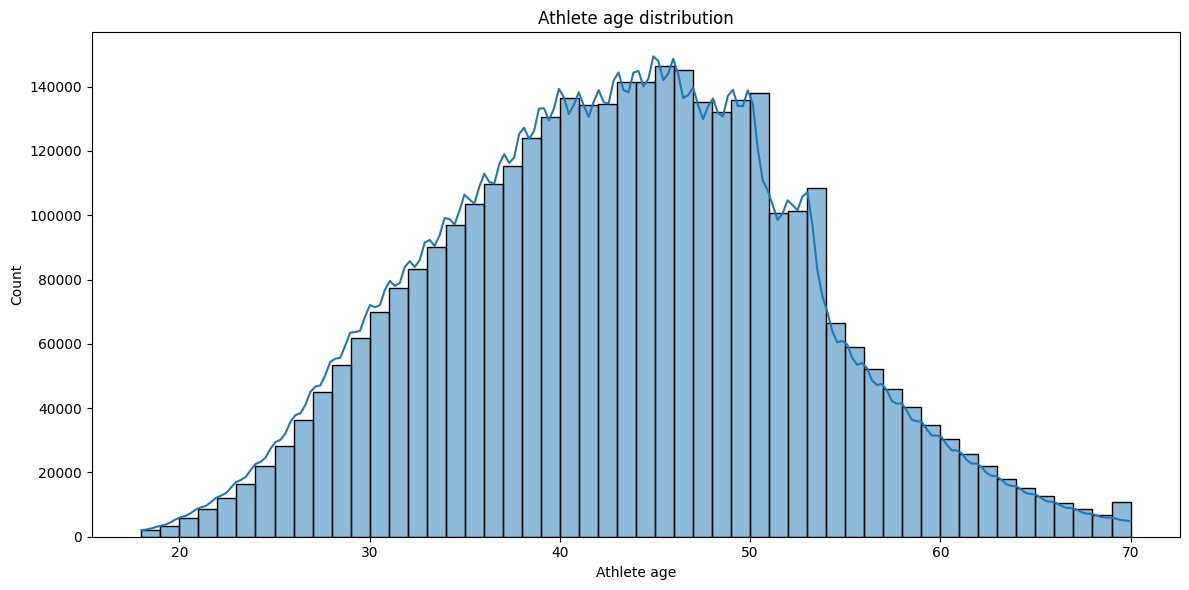

In [171]:
# Athlete age distribution
plt.figure(figsize=(12,6))

sns.histplot(
    data=df,
    x='Athlete age',
    kde=True,
    bins=52,

)
plt.title("Athlete age distribution")
plt.tight_layout()
plt.show()

In [172]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a figure with a specific size
# plt.figure(figsize=(10, 6))

# # Use regplot to show the relationship between Athlete Age and Performance Time
# sns.regplot(x='Athlete age', y='Athlete performance', data=df)

# # Add labels to axes
# plt.xlabel('Athlete Age')
# plt.ylabel('Performance Time')

# # Add a title to the plot
# plt.title('Performance Time vs. Athlete Age')

# # Adjust layout to prevent label cutoff
# plt.tight_layout()

# # Display the plot
# plt.show()